# SIT 720 - Machine Learning

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

## Assessment Task 5 (35 marks)

In this assignment, you will use a lot of concepts learnt in this course to come up with a good solution for a given chronic kidney disease prediction problem.

## Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum ten sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A5_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 219306444

# Student name: Muhammad Akbar Husnoo

##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure(numerical): bp in mm/Hg
3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal): al - (0,1,2,3,4,5)
5.Sugar(nominal): su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal): rbc - (normal,abnormal)
7.Pus Cell (nominal): pc - (normal,abnormal)
8.Pus Cell clumps(nominal): pcc - (present,notpresent)
9.Bacteria(nominal): ba - (present,notpresent)
10.Blood Glucose Random(numerical): bgr in mgs/dl
11.Blood Urea(numerical): bu in mgs/dl
12.Serum Creatinine(numerical): sc in mgs/dl
13.Sodium(numerical): sod in mEq/L
14.Potassium(numerical): pot in mEq/L
15.Hemoglobin(numerical): hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical): wc in cells/cumm
18.Red Blood Cell Count(numerical): rc in millions/cmm
19.Hypertension(nominal): htn - (yes,no)
20.Diabetes Mellitus(nominal): dm - (yes,no)
21.Coronary Artery Disease(nominal): cad - (yes,no)
22.Appetite(nominal): appet - (good,poor)
23.Pedal Edema(nominal): pe - (yes,no)
24.Anemia(nominal): ane - (yes,no)
25.Class (nominal): class - (ckd, notckd)


## Part 1: Short questions: **(6 marks)**




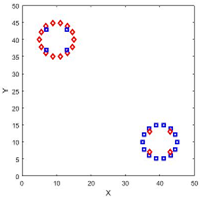


1.  For the above figure, what value of k in KNN method will give the best accuracy for leave-one-out cross-validation. Report accuracy and k value. **(3 marks)**

Based on the plot above, it can be seen that n = 36 (by counting the number of points on the plot). If we were to choose k = 1, there would be 16 wrong classifications. In general, k-value cannot be an even number as there is a risk of a tie in the decision of which class the new instance must be set.

n = 36

Wrong Classification = 8

Correct Classifications = 36-8 = 28

Formula for accuracy = [Correct Classifications/n]

Therefore, the optimal k value in this scenario will be k = 3 and the accuracy will be 77.78% [(36-8)/36].

2.  In classification, overfitting and underfitting is a big problem. Does it happen in Random Forest or not? Why? **(3 marks)**

References:
1. https://link.springer.com/article/10.1023/a:1010933404324
2. https://www.quora.com/Do-random-forests-tend-to-overfit-as-more-trees-are-added
3. https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning

According to Breiman, Random Forests (RFs) usually do not overfit. Based on the Law of Large Numbers, even when the number of trees increase, RFs always converge and produces a limiting value of the generalization error[1]. In simpler terms, the increase in the number of trees reduces overfitting/high variance since RFs simply averages the results of the large number of independent trees [2].

On the otherhand, RFs may underfit in certain cases such as when the minimum requirement of splitting a node is so high that there are no significant splits observed as well as when max_leaf_nodes is very small [3].

## Part 2: **(24 marks = 4 methods x 6)**

Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset. **(1 marks)**

**B.** For each optimised model, answer the followings -  **(3 marks)**

*  which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]

*  what set or range of values were used for each hyperparameter?

*  which metric was used to measure the performance?

*  justify your design decisions.

**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value. **(1 marks)**

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy. **(1 marks)**

In [2]:
#library imports added by student
import pandas as pd
import numpy as np
import logging
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
'''
References:
1. https://glassboxmedicine.com/2019/09/15/best-use-of-train-val-test-splits-with-tips-for-medical-data/
2. https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
3. https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310
'''
print('\033[1m' + '\nPRE-PROCESSING LOGIC EXPLANATIONS' +'\033[0m')

print('\nThe 70%-30% test train split is one of the most common and best splits.[1] This is why 70-30 was used.')
print('\nSince missing values are only present in the features data and not in the target class, missing value imputation can be used.[2]')
print('\nKNN Imputation method is used to impute missing/na values because the sample size is relatively small and \
discarding records would not be a good option as the sample size will further decrease. Furthermore, KNN imputation works \
best for numerical values.[2]')
print('\nFeature Scaling and Nomalization is used to improve convergence speed of an algorithm as well as may minimize training time.[3] ')


PRE-PROCESSING LOGIC EXPLANATIONS

The 70%-30% test train split is one of the most common and best splits.[1] This is why 70-30 was used.

Since missing values are only present in the features data and not in the target class, missing value imputation can be used.[2]

KNN Imputation method is used to impute missing/na values because the sample size is relatively small and discarding records would not be a good option as the sample size will further decrease. Furthermore, KNN imputation works best for numerical values.[2]

Feature Scaling and Nomalization is used to improve convergence speed of an algorithm as well as may minimize training time.[3] 


In [4]:
#Database loading and pre-processing
'''
Code References:
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
2. https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
3. https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
4. https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
'''
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

#initialise variable with dataset name
dataset_name = 'chronic_kidney_disease.csv'

#error-handling to prevent abnormal termination of code
try:
    #import and load weather dataset into pandas dataframe
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(chronic_kidney_disease_dataframe)
    #Missing value imputation
    #replace ? to nan values
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
    
    #set the features and the target variables
    target_class = chronic_kidney_disease_dataframe['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = chronic_kidney_disease_dataframe.iloc[:, 0:24]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    
    #split the dataset into training and testing data
    train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3)
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(train_target.shape[0]))
    print('Size of test dataset: ' + str(test_target.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
p

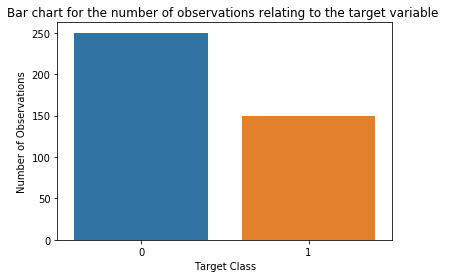

In [5]:
#Target class Visualisatiom

#graph a count plot to check the number of observations relative to the target variable
sns.countplot(pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target Class')
plt.ylabel('Number of Observations')
plt.show()

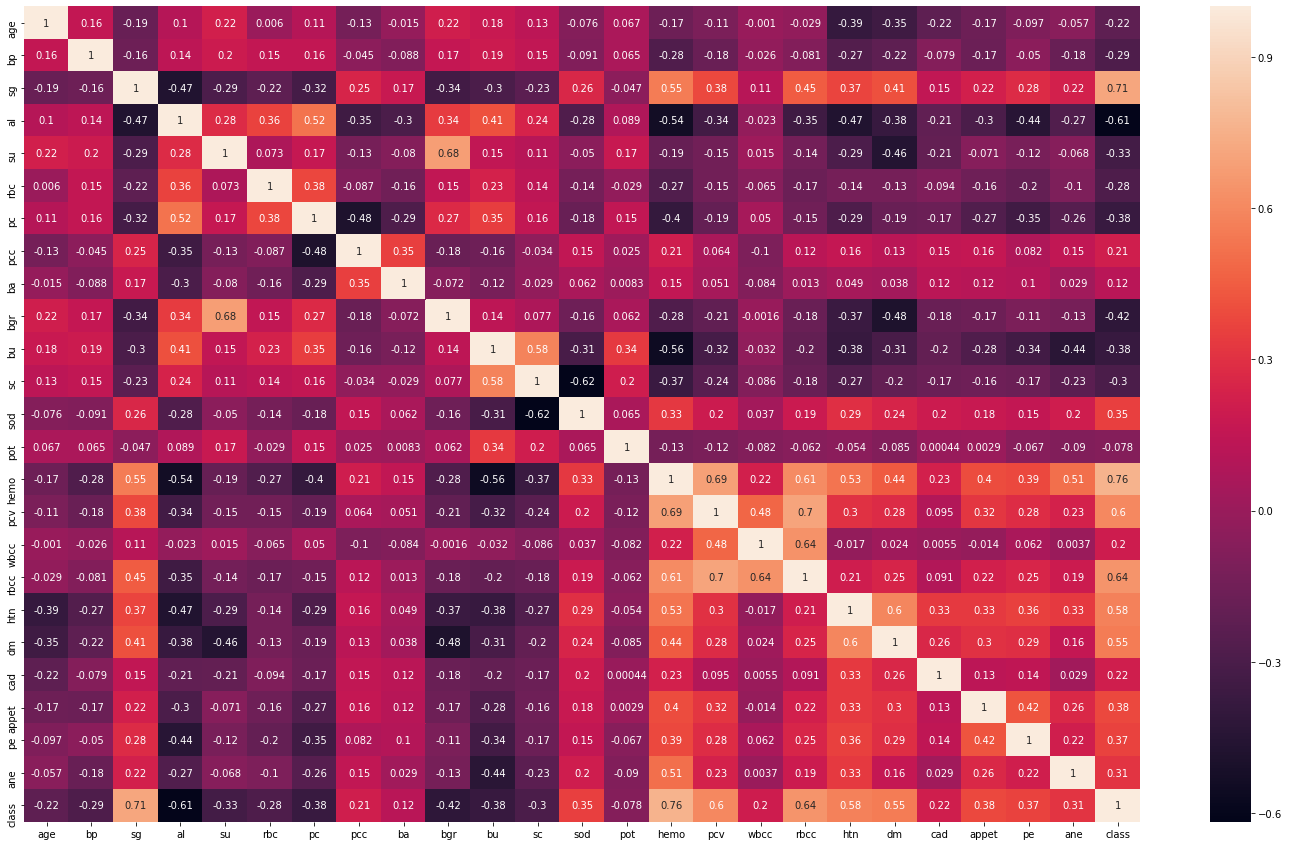



Based on the above plot, Hemoglobin (hemo) and Specific Gravity (sg) have the two highest correlation with the target variable respectively. However, no variables will be discarded for the purpose of this assessment.


In [6]:
plt.figure(figsize=(25,15)) 
sns.heatmap(pd.concat([feature_classes, target_class1], axis=1, sort=False).corr(), annot=True)
plt.show()

print('\n\nBased on the above plot, Hemoglobin (hemo) and Specific Gravity (sg) have the two highest \
correlation with the target variable respectively. However, no variables will be discarded for the \
purpose of this assessment.')

The best parameters are:
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Precision: 0.9642857142857143
Accuracy: 0.9583333333333334
Recall: 0.9473684210526315
F1-score: 0.9557522123893805

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.96      0.95      0.96        57

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120


Confusion Matrix: 
[[61  2]
 [ 3 54]]


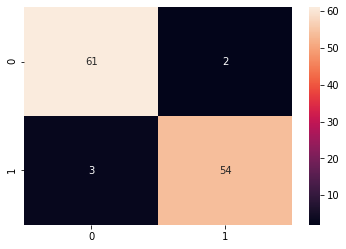

In [7]:
#Support vector machine
'''
Code References:
1. https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
2. https://scikit-learn.org/stable/modules/model_evaluation.html
'''

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(test_features)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

B. For SVM:

The parameters being optimized are:
1. Kernel - Kernel Values used included poly, rbf, linear and sigmoid.
2. C - C values used were 0.1, 1, 10, 100, 1000
3. Gamma - Gamma values used were scale and auto.
4. Shrinking - Shrinking values used were True and False

Accuracy is used as the performance evaluation metric because:
1. The data target class is pretty balanced. (ratio of notckd and ckd 5:3) &
2. Accuracy is good for classification problems.

Design Justifications:
1. C - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
2. Kernel - Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape
3. Gamma - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.If gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,if ‘auto’, uses 1 / n_features.
4. Shrinking - Whether to use the shrinking heuristic.

In [8]:
'''
Code References:
1. https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
'''
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)

def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D,'annotate3D',_annotate3D)


Please note that Shrinking has been encoded whereby 0 = False, 1 = True
Please note that Gamma has been encoded whereby 0 = auto, 1 = scale


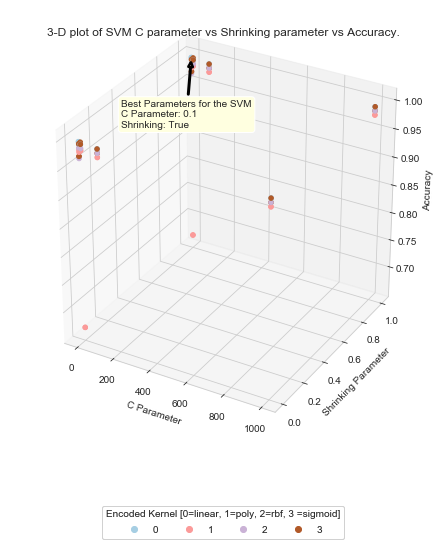

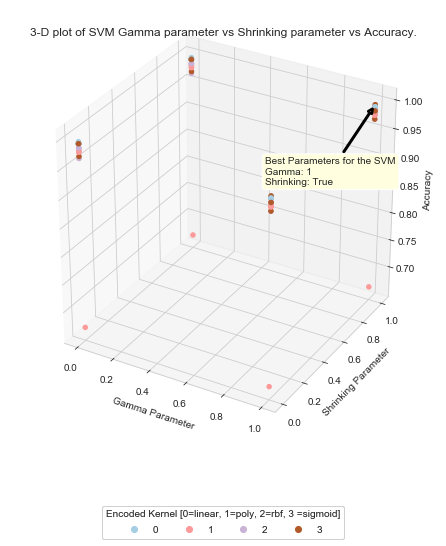

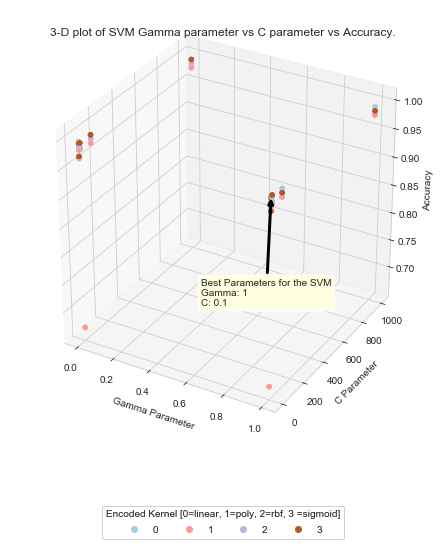

In [9]:
'''
Code References:
1. https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
'''
sns.set_style("whitegrid", {'axes.grid' : False})

#initialise empty lists
svm_C = []
svm_gamma = []
svm_kernel = []
svm_shrinking = []
svm_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in svm_grid_search.cv_results_['mean_test_score']:
        svm_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in svm_grid_search.cv_results_['params']:
    svm_C.append(each_parameter_combination['C'])
    svm_gamma.append(each_parameter_combination['gamma'])
    svm_kernel.append(each_parameter_combination['kernel'])
    svm_shrinking.append(each_parameter_combination['shrinking'])

#merge all the above lists into one single dataframe to summarize the SVM cross validation result
cross_validation_results_df = pd.DataFrame(svm_C, columns = ['C'])
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_gamma, columns = ['gamma']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_kernel, columns = ['kernel']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_shrinking, columns = ['shrinking']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_accuracy, columns = ['Accuracy']))

#encode the categorical SVM parameters of kernel, Shrinking and Gamma
svm_plot_encoder = preprocessing.LabelEncoder()
encoded_kernel = svm_plot_encoder.fit_transform(cross_validation_results_df['kernel'])
encoded_shrinking = svm_plot_encoder.fit_transform(cross_validation_results_df['shrinking'])
encoded_gamma = svm_plot_encoder.fit_transform(cross_validation_results_df['gamma'])

print('Please note that Shrinking has been encoded whereby 0 = False, 1 = True')
print('Please note that Gamma has been encoded whereby 0 = auto, 1 = scale')

#Save best model parameters
svm_best_parameters = svm_grid_search.best_params_

#For annotation purposes
best_accuracy_svm = max(cross_validation_results_df['Accuracy'])
best_C_svm = svm_best_parameters['C']
best_gamma_svm = svm_best_parameters['gamma']
best_kernel_svm = svm_best_parameters['kernel']
best_shrinking_svm = svm_best_parameters['shrinking']

#encoding best shrinking
if (best_shrinking_svm == 'False'):
    best_shrinking_svm = 0
elif (best_shrinking_svm == 'True'):
    best_shrinking_svm = 1

#encoding best Gamma
if (best_gamma_svm == 'auto'):
    best_gamma_svm = 0
elif (best_gamma_svm == 'scale'):
    best_gamma_svm = 1

#PLOT 1: C vs Shrinking Vs Accuracy Plot
#assign a 6x6 figure size
fig1 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax1 = Axes3D(fig1)
#plot a 3-D scatter plot
scatter1 = ax1.scatter(cross_validation_results_df['C'], encoded_shrinking, 
                      cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax1.set_title('3-D plot of SVM C parameter vs Shrinking parameter vs Accuracy.')
ax1.set_xlabel('C Parameter')
ax1.set_ylabel('Shrinking Parameter')
ax1.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend1 = ax1.legend(*scatter1.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax1.add_artist(legend1)
#annotation
parameters_annotation1 = 'Best Parameters for the SVM\nC Parameter: ' + str(best_C_svm) + '\nShrinking: ' + str(best_shrinking_svm)
ax1.annotate3D(parameters_annotation1, (best_C_svm, best_shrinking_svm, best_accuracy_svm), xytext=(-70,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: Gamma vs Shrinking Vs Accuracy Plot
#assign a 6x6 figure size
fig2 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax2 = Axes3D(fig2)
#plot a 3-D scatter plot
scatter2 = ax2.scatter(encoded_gamma, encoded_shrinking,
                       cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax2.set_title('3-D plot of SVM Gamma parameter vs Shrinking parameter vs Accuracy.')
ax2.set_xlabel('Gamma Parameter')
ax2.set_ylabel('Shrinking Parameter')
ax2.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax2.add_artist(legend2)
#annotation
parameters_annotation2 = 'Best Parameters for the SVM\nGamma: ' + str(best_gamma_svm) + '\nShrinking: ' + str(best_shrinking_svm)
ax2.annotate3D(parameters_annotation2, (best_gamma_svm, best_shrinking_svm, best_accuracy_svm), xytext=(-110,-80), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: Gamma vs C Vs Accuracy Plot
#assign a 6x6 figure size
fig3 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax3 = Axes3D(fig3)
#plot a 3-D scatter plot
scatter3 = ax3.scatter(encoded_gamma, cross_validation_results_df['C'],
                       cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax3.set_title('3-D plot of SVM Gamma parameter vs C parameter vs Accuracy.')
ax3.set_xlabel('Gamma Parameter')
ax3.set_ylabel('C Parameter')
ax3.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend3 = ax3.legend(*scatter3.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax3.add_artist(legend3)
#annotation
parameters_annotation3 = 'Best Parameters for the SVM\nGamma: ' + str(best_gamma_svm) + '\nC: ' + str(best_C_svm)
ax3.annotate3D(parameters_annotation3, (best_gamma_svm, best_C_svm, best_accuracy_svm), xytext=(-70,-110), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

The best parameters are:
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 2, 'weights': 'uniform'}

The best model after gridsearch is:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=2, p=2,
                     weights='uniform')

Precision: 0.9137931034482759
Accuracy: 0.925
Recall: 0.9298245614035088
F1-score: 0.9217391304347825

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.91      0.93      0.92        57

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120


Confusion Matrix: 
[[58  5]
 [ 4 53]]


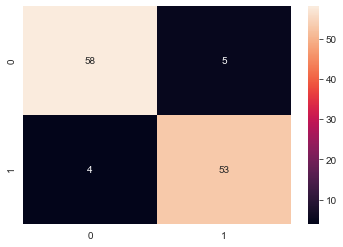

In [10]:
#K-Nearest Neighbour
'''
Code References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
'''
from sklearn.neighbors import KNeighborsClassifier

#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}

#apply exhaustice gridsearch to find the optimal solution
knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))

#KNN predictions on test features
knn_prediction = knn_grid_search.predict(test_features)

#display KNN classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))

#display classification report for KNN
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, knn_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, knn_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
plt.show()

B. For KNN:

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}
                       
The parameters being optimized are:
1. n_neighbours - N_neighbours values used are in the range of 1 to 10.
2. weights - Weights values used were uniform and distance
3. algorithm - Algorithm values used were auto, ball_tree, kd_tree and brute.
4. n_jobs - n_jobs values used were 1 and -1.

Accuracy is used as the performance evaluation metric because:
1. The data target class is pretty balanced. (ratio of notckd and ckd 5:3) &
2. Accuracy is good for classification problems.

Design Justifications:
1. N_neighbours - Number of neighbors to use by default for kneighbors queries.
2. Weights - ‘uniform’ : all points in each neighborhood are weighted equally; 'distance’ : closer neighbors of a query point will have a greater influence than neighbors which are further away. 
3. Algorithm - ‘ball_tree’ will use BallTree, ‘kd_tree’ will use KDTree, ‘brute’ will use a brute-force search and ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
4. N_jobs - 1 means using 1 processor and -1 means using all processors

Please note that Algorithms has been encoded whereby 0 = auto, 1 = ball_tree, 2 = brute, 3 = kd_tree


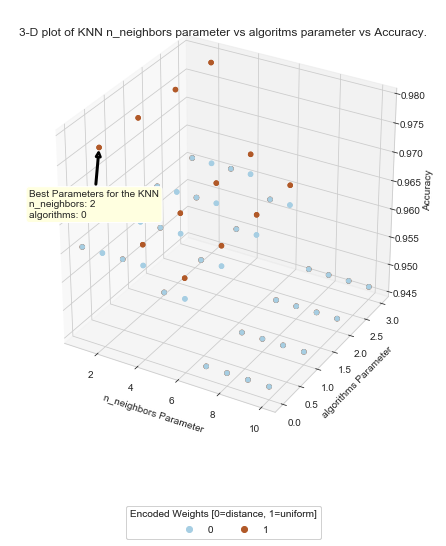

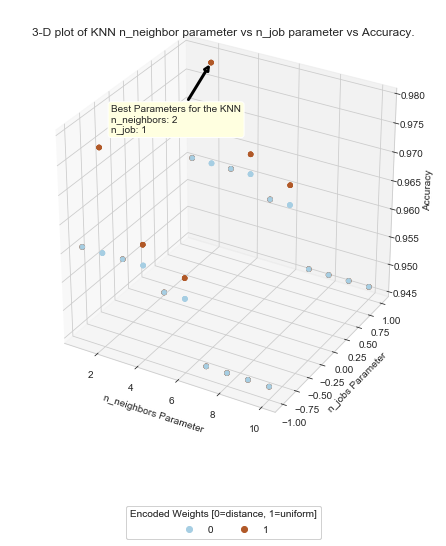

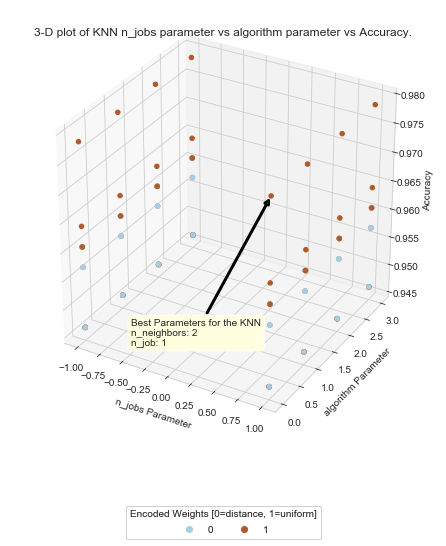

In [11]:
'''
Code References:
1. https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
'''

#initialise empty lists
knn_n_neighbours = []
knn_weights = []
knn_algorithm = []
knn_n_jobs = []
knn_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in knn_grid_search.cv_results_['mean_test_score']:
        knn_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in knn_grid_search.cv_results_['params']:
    knn_n_neighbours.append(each_parameter_combination['n_neighbors'])
    knn_weights.append(each_parameter_combination['weights'])
    knn_algorithm.append(each_parameter_combination['algorithm'])
    knn_n_jobs.append(each_parameter_combination['n_jobs'])

#merge all the above lists into one single dataframe to summarize the KNN cross validation result
cross_validation_results_df1 = pd.DataFrame(knn_n_neighbours, columns = ['n_neighbors'])
cross_validation_results_df1 = cross_validation_results_df1.join(pd.DataFrame(knn_weights, columns = ['weights']))
cross_validation_results_df1 = cross_validation_results_df1.join(pd.DataFrame(knn_algorithm, columns = ['algorithm']))
cross_validation_results_df1 = cross_validation_results_df1.join(pd.DataFrame(knn_n_jobs, columns = ['n_jobs']))
cross_validation_results_df1 = cross_validation_results_df1.join(pd.DataFrame(knn_accuracy, columns = ['Accuracy']))

#encode the categorical KNN parameters of weights and algorithms
knn_plot_encoder = preprocessing.LabelEncoder()
encoded_weights = knn_plot_encoder.fit_transform(cross_validation_results_df1['weights'])
encoded_algorithms = knn_plot_encoder.fit_transform(cross_validation_results_df1['algorithm'])

print('Please note that Algorithms has been encoded whereby 0 = auto, 1 = ball_tree, 2 = brute, 3 = kd_tree')

#Save best model parameters
knn_best_parameters = knn_grid_search.best_params_

#For annotation purposes
best_accuracy_knn = max(cross_validation_results_df1['Accuracy'])
best_n_neighbour_knn = knn_best_parameters['n_neighbors']
best_weight_knn = knn_best_parameters['weights']
best_algorithm_knn = knn_best_parameters['algorithm']
best_n_jobs_knn = knn_best_parameters['n_jobs']

#encoding best splitter
if (best_algorithm_knn == 'auto'):
    best_algorithm_knn = 0
elif (best_algorithm_knn == 'ball_tree'):
    best_algorithm_knn = 1
elif (best_algorithm_knn == 'brute'):
    best_algorithm_knn = 2
elif (best_algorithm_knn == 'kd_tree'):
    best_algorithm_knn = 3
    
#PLOT 1: n_neighbour vs algorithms Vs Accuracy Plot
#assign a 6x6 figure size
fig4 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax4 = Axes3D(fig4)
#plot a 3-D scatter plot
scatter4 = ax4.scatter(cross_validation_results_df1['n_neighbors'], encoded_algorithms, 
                      cross_validation_results_df1['Accuracy'], marker='o', c = encoded_weights, depthshade=False, cmap='Paired')
#assign axes titles
ax4.set_title('3-D plot of KNN n_neighbors parameter vs algoritms parameter vs Accuracy.')
ax4.set_xlabel('n_neighbors Parameter')
ax4.set_ylabel('algorithms Parameter')
ax4.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend4 = ax4.legend(*scatter4.legend_elements(), loc="lower center", title="Encoded Weights [0=distance, 1=uniform]", borderaxespad=-10, ncol=4)
ax4.add_artist(legend4)
#annotation
parameters_annotation4 = 'Best Parameters for the KNN\nn_neighbors: ' + str(best_n_neighbour_knn) + '\nalgorithms: ' + str(best_algorithm_knn)
ax4.annotate3D(parameters_annotation4, (best_n_neighbour_knn, best_algorithm_knn, best_accuracy_knn), xytext=(-70,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: n_neighbour vs n_job Vs Accuracy Plot
#assign a 6x6 figure size
fig5 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax5 = Axes3D(fig5)
#plot a 3-D scatter plot
scatter5 = ax5.scatter(cross_validation_results_df1['n_neighbors'], cross_validation_results_df1['n_jobs'],
                       cross_validation_results_df1['Accuracy'], marker='o', c = encoded_weights, depthshade=False, cmap='Paired')
#assign axes titles
ax5.set_title('3-D plot of KNN n_neighbor parameter vs n_job parameter vs Accuracy.')
ax5.set_xlabel('n_neighbors Parameter')
ax5.set_ylabel('n_jobs Parameter')
ax5.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend5 = ax5.legend(*scatter5.legend_elements(), loc="lower center", title="Encoded Weights [0=distance, 1=uniform]", borderaxespad=-10, ncol=4)
ax5.add_artist(legend5)
#annotation
parameters_annotation5 = 'Best Parameters for the KNN\nn_neighbors: ' + str(best_n_neighbour_knn) + '\nn_job: ' + str(best_n_jobs_knn)
ax5.annotate3D(parameters_annotation5, (best_n_neighbour_knn, best_n_jobs_knn, best_accuracy_knn), xytext=(-100,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: algorithm vs n_job C Vs Accuracy Plot
#assign a 6x6 figure size
fig6 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax6 = Axes3D(fig6)
#plot a 3-D scatter plot
scatter6 = ax6.scatter(cross_validation_results_df1['n_jobs'], encoded_algorithms,
                       cross_validation_results_df1['Accuracy'], marker='o', c = encoded_weights, depthshade=False, cmap='Paired')
#assign axes titles
ax6.set_title('3-D plot of KNN n_jobs parameter vs algorithm parameter vs Accuracy.')
ax6.set_xlabel('n_jobs Parameter')
ax6.set_ylabel('algorithm Parameter')
ax6.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend6 = ax6.legend(*scatter6.legend_elements(), loc="lower center", title="Encoded Weights [0=distance, 1=uniform]", borderaxespad=-10, ncol=4)
ax6.add_artist(legend6)
#annotation
parameters_annotation6 = 'Best Parameters for the KNN\nn_jobs: ' + str(best_n_jobs_knn) + '\nalgorithm: ' + str(best_algorithm_knn)
ax6.annotate3D(parameters_annotation5, (best_n_jobs_knn, best_algorithm_knn, best_accuracy_knn), xytext=(-140,-150), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'best'}

The best model after gridsearch is:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Precision: 0.9622641509433962
Accuracy: 0.9333333333333333
Recall: 0.8947368421052632
F1-score: 0.9272727272727272

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        63
           1       0.96      0.89      0.93        57

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted 

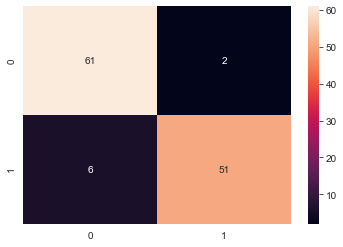

In [12]:
#Decision tree
'''
Code References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
from sklearn.tree import DecisionTreeClassifier

#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
dt_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(dt_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

#Decision Tree predictions on test features
dt_prediction = dt_grid_search.predict(test_features)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, dt_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, dt_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
plt.show()

B. For Decision Tree:
                      
The parameters being optimized are:
1. Criterion - Criterion Values used included gini and entropy.
2. Splitter - Splitter values used were best and random.
3. Min_samples_leaf - Min_samples_leaf values used were in range of 1 to 5.
4. Max_features - Max_features values used were auto, sqrt and log2.

Accuracy is used as the performance evaluation metric because:
1. The data target class is pretty balanced. (ratio of notckd and ckd 5:3) &
2. Accuracy is good for classification problems.

Design Justifications:
1. Criterion - to measure the quality of a split. “Gini” is for the Gini impurity and “entropy” is for the information gain.
2. Splitter - to choose the split at each node. “Best” is to choose the best split and “random” is to choose the best random split.
3. Min_samples_leaf - split point at any depth will only be considered. This may have the effect of smoothing the model.
4. Max_features - number of features to consider when looking for the best split. 

Please note that splitter has been encoded whereby 0 = best, 1 = random
Please note that max_features has been encoded whereby 0 = auto, 1 = log2 and 2 = sqrt


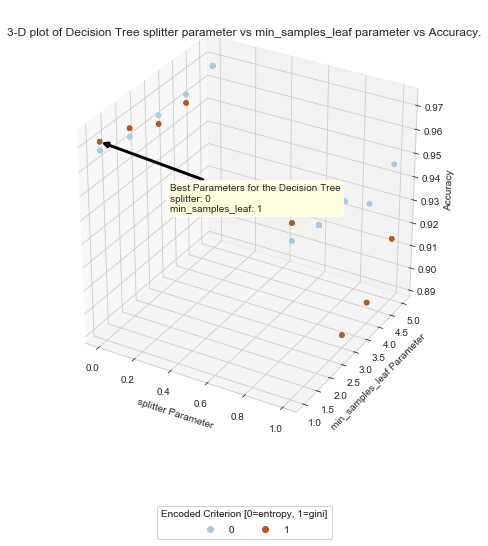

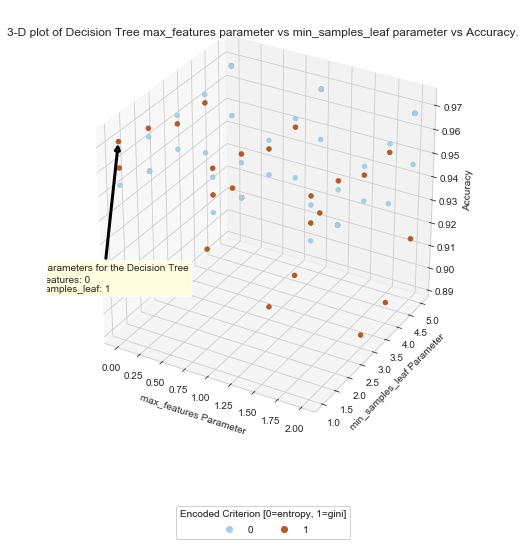

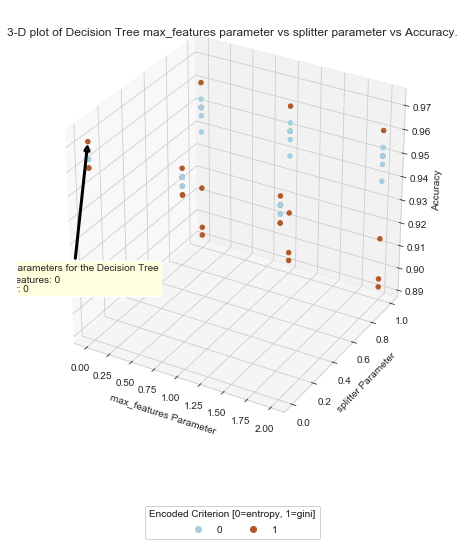

In [13]:
'''
Code References:
1. https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
'''

#initialise empty lists
dt_criterion = []
dt_splitter = []
dt_min_samples_leaf = []
dt_max_features = []
dt_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in dt_grid_search.cv_results_['mean_test_score']:
        dt_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in dt_grid_search.cv_results_['params']:
    dt_criterion.append(each_parameter_combination['criterion'])
    dt_splitter.append(each_parameter_combination['splitter'])
    dt_min_samples_leaf.append(each_parameter_combination['min_samples_leaf'])
    dt_max_features.append(each_parameter_combination['max_features'])

#merge all the above lists into one single dataframe to summarize the decision tree cross validation result
cross_validation_results_df2 = pd.DataFrame(dt_criterion, columns = ['criterion'])
cross_validation_results_df2 = cross_validation_results_df2.join(pd.DataFrame(dt_splitter, columns = ['splitter']))
cross_validation_results_df2 = cross_validation_results_df2.join(pd.DataFrame(dt_min_samples_leaf, columns = ['min_samples_leaf']))
cross_validation_results_df2 = cross_validation_results_df2.join(pd.DataFrame(dt_max_features, columns = ['max_features']))
cross_validation_results_df2 = cross_validation_results_df2.join(pd.DataFrame(dt_accuracy, columns = ['Accuracy']))

#encode the categorical decision parameters of weights and algorithms
dt_plot_encoder = preprocessing.LabelEncoder()
encoded_splitter = dt_plot_encoder.fit_transform(cross_validation_results_df2['splitter'])
encoded_criterion = dt_plot_encoder.fit_transform(cross_validation_results_df2['criterion'])
encoded_max_features = dt_plot_encoder.fit_transform(cross_validation_results_df2['max_features'])

print('Please note that splitter has been encoded whereby 0 = best, 1 = random')
print('Please note that max_features has been encoded whereby 0 = auto, 1 = log2 and 2 = sqrt')

#Save best model parameters
dt_best_parameters = dt_grid_search.best_params_

#For annotation purposes
best_accuracy_dt = max(cross_validation_results_df2['Accuracy'])
best_min_samples_leaf_dt = dt_best_parameters['min_samples_leaf']
best_max_features_dt = dt_best_parameters['max_features']
best_criterion_dt = dt_best_parameters['criterion']
best_splitter_dt = dt_best_parameters['splitter']

#encoding best splitter
if (best_splitter_dt == 'best'):
    best_splitter_dt = 0
elif (best_splitter_dt == 'random'):
    best_splitter_dt = 1
    
#encoding best max feature
if (best_max_features_dt == 'auto'):
    best_max_features_dt = 0
elif (best_max_features_dt == 'log2'):
    best_max_features_dt = 1
elif (best_max_features_dt == 'sqrt'):
    best_max_features_dt = 2
    
#PLOT 1: splitter vs min_samples_leaf Vs Accuracy Plot
#assign a 6x6 figure size
fig7 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax7 = Axes3D(fig7)
#plot a 3-D scatter plot
scatter7 = ax7.scatter(encoded_splitter, cross_validation_results_df2['min_samples_leaf'],
                       cross_validation_results_df2['Accuracy'], marker='o', c = encoded_criterion, depthshade=False, cmap='Paired')
#assign axes titles
ax7.set_title('3-D plot of Decision Tree splitter parameter vs min_samples_leaf parameter vs Accuracy.')
ax7.set_xlabel('splitter Parameter')
ax7.set_ylabel('min_samples_leaf Parameter')
ax7.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend7 = ax7.legend(*scatter7.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax7.add_artist(legend7)
#annotation
parameters_annotation7 = 'Best Parameters for the Decision Tree\nsplitter: ' + str(best_splitter_dt) + '\nmin_samples_leaf: ' + str(best_min_samples_leaf_dt)
ax7.annotate3D(parameters_annotation7,(best_splitter_dt, best_min_samples_leaf_dt, best_accuracy_dt), xytext=(70,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: max_features vs min_samples_leaf Vs Accuracy Plot
#assign a 6x6 figure size
fig8 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax8 = Axes3D(fig8)
#plot a 3-D scatter plot
scatter8 = ax8.scatter(encoded_max_features, cross_validation_results_df2['min_samples_leaf'],
                       cross_validation_results_df2['Accuracy'], marker='o', c = encoded_criterion, depthshade=False, cmap='Paired')
#assign axes titles
ax8.set_title('3-D plot of Decision Tree max_features parameter vs min_samples_leaf parameter vs Accuracy.')
ax8.set_xlabel('max_features Parameter')
ax8.set_ylabel('min_samples_leaf Parameter')
ax8.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend8 = ax8.legend(*scatter8.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax8.add_artist(legend8)
#annotation
parameters_annotation8 = 'Best Parameters for the Decision Tree\nmax_features: ' + str(best_max_features_dt) + '\nmin_samples_leaf: ' + str(best_min_samples_leaf_dt)
ax8.annotate3D(parameters_annotation8,(best_max_features_dt, best_min_samples_leaf_dt, best_accuracy_dt), xytext=(-100,-150), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: max_features vs splitter Vs Accuracy Plot
#assign a 6x6 figure size
fig9 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax9 = Axes3D(fig9)
#plot a 3-D scatter plot
scatter9 = ax9.scatter(encoded_max_features, encoded_splitter,
                       cross_validation_results_df2['Accuracy'], marker='o', c = encoded_criterion, depthshade=False, cmap='Paired')
#assign axes titles
ax9.set_title('3-D plot of Decision Tree max_features parameter vs splitter parameter vs Accuracy.')
ax9.set_xlabel('max_features Parameter')
ax9.set_ylabel('splitter Parameter')
ax9.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend9 = ax9.legend(*scatter9.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax9.add_artist(legend9)
#annotation
parameters_annotation9 = 'Best Parameters for the Decision Tree\nmax_features: ' + str(best_max_features_dt) + '\nsplitter: ' + str(best_splitter_dt)
ax9.annotate3D(parameters_annotation9,(best_max_features_dt, best_splitter_dt, best_accuracy_dt), xytext=(-100,-150), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 10}

The best model after gridsearch is:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Precision: 1.0
Accuracy: 0.975
Recall: 0.9473684210526315
F1-score: 0.972972972972973

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       1.00      0.95      0.97        57

    accuracy                

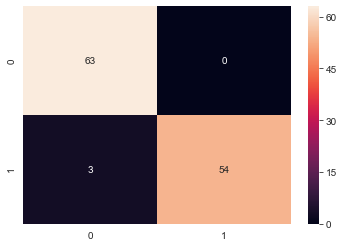

In [14]:
#Random forest
'''
Code References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
'''
from sklearn.ensemble import RandomForestClassifier

#initialise the random forest Model
random_forest_model = RandomForestClassifier(random_state = 0)

#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100], 
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
rf_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rf_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

#Random Forest predictions on test features
rf_prediction = rf_grid_search.predict(test_features)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(test_target, rf_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, rf_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, rf_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, rf_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, rf_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, rf_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, rf_prediction), annot = True)
plt.show()

B. For Random Forests:
                      
The parameters being optimized are:
1. Criterion - Criterion Values used included gini and entropy.
2. N_estimators - N_estimators values used were multiples of ten from 10 to 100.
3. Min_samples_split - Min_samples_split values used were in range of 1.0 to 5.
4. Max_features - Max_features values used were auto, sqrt and log2.

Accuracy is used as the performance evaluation metric because:
1. The data target class is pretty balanced. (ratio of notckd and ckd 5:3) &
2. Accuracy is good for classification problems.

Design Justifications:
1. Criterion - to measure the quality of a split. “Gini” is for the Gini impurity and “entropy” is for the information gain.
2. n_estimators - number of trees in the forest, The more the better.
3. Min_samples_split - minimum number of samples required to split an internal node

Please note that max_features has been encoded whereby 0 = auto, 1 = log2, 2 = sqrt


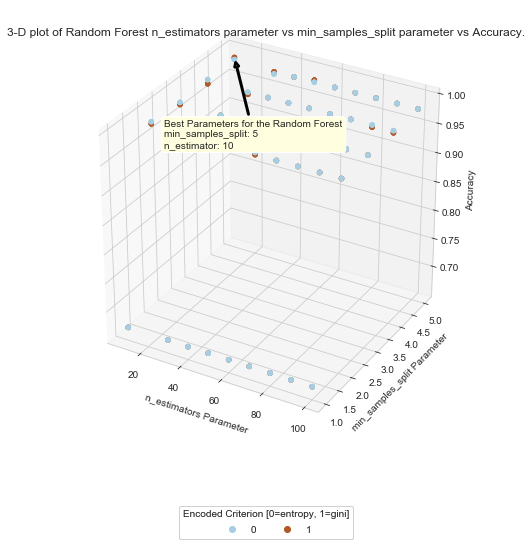

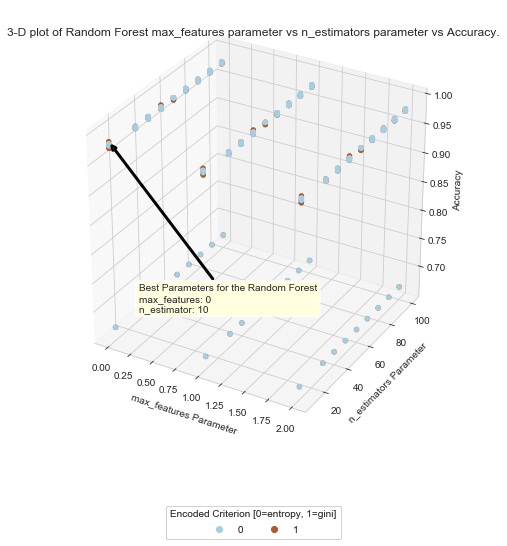

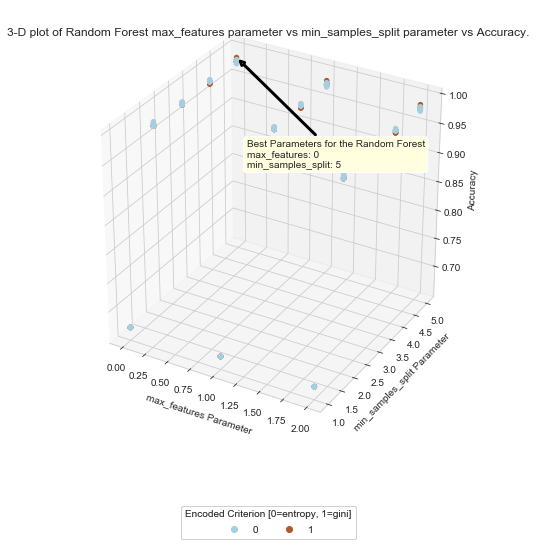

In [15]:
'''
Code References:
1. https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
2. https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
'''

#initialise empty lists
rf_criterion = []
rf_n_estimators = []
rf_min_samples_split = []
rf_max_features = []
rf_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in rf_grid_search.cv_results_['mean_test_score']:
        rf_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in rf_grid_search.cv_results_['params']:
    rf_criterion.append(each_parameter_combination['criterion'])
    rf_n_estimators.append(each_parameter_combination['n_estimators'])
    rf_min_samples_split.append(each_parameter_combination['min_samples_split'])
    rf_max_features.append(each_parameter_combination['max_features'])

#merge all the above lists into one single dataframe to summarize the random forest cross validation result
cross_validation_results_df3 = pd.DataFrame(rf_criterion, columns = ['criterion'])
cross_validation_results_df3 = cross_validation_results_df3.join(pd.DataFrame(rf_n_estimators, columns = ['n_estimators']))
cross_validation_results_df3 = cross_validation_results_df3.join(pd.DataFrame(rf_min_samples_split, columns = ['min_samples_split']))
cross_validation_results_df3 = cross_validation_results_df3.join(pd.DataFrame(rf_max_features, columns = ['max_features']))
cross_validation_results_df3 = cross_validation_results_df3.join(pd.DataFrame(rf_accuracy, columns = ['Accuracy']))

#encode the categorical random forest parameters of weights and algorithms
rf_plot_encoder = preprocessing.LabelEncoder()
encoded_max_features1 = rf_plot_encoder.fit_transform(cross_validation_results_df3['max_features'])
encoded_criterion1 = rf_plot_encoder.fit_transform(cross_validation_results_df3['criterion'])

print('Please note that max_features has been encoded whereby 0 = auto, 1 = log2, 2 = sqrt')

#Save best model parameters
rf_best_parameters = rf_grid_search.best_params_

#For annotation purposes
best_accuracy = max(cross_validation_results_df3['Accuracy'])
best_min_samples_split = rf_best_parameters['min_samples_split']
best_max_features = rf_best_parameters['max_features']
best_criterion = rf_best_parameters['criterion']
best_n_estimator = rf_best_parameters['n_estimators']

#encoding
if (best_max_features == 'auto'):
    best_max_features = 0
elif (best_max_features == 'log2'):
    best_max_features = 1
elif (best_max_features == 'sqrt'):
    best_max_features = 2

#PLOT 1: n_estimators vs min_samples_split Vs Accuracy Plot
#assign a 6x6 figure size
fig10 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax10 = Axes3D(fig10)
#plot a 3-D scatter plot
scatter10 = ax10.scatter(cross_validation_results_df3['n_estimators'], cross_validation_results_df3['min_samples_split'],
                         cross_validation_results_df3['Accuracy'], marker='o', c = encoded_criterion1, depthshade=False, cmap='Paired')
#assign axes titles
ax10.set_title('3-D plot of Random Forest n_estimators parameter vs min_samples_split parameter vs Accuracy.')
ax10.set_xlabel('n_estimators Parameter')
ax10.set_ylabel('min_samples_split Parameter')
ax10.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend10 = ax10.legend(*scatter10.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax10.add_artist(legend10)
#annotation
parameters_annotation10 = 'Best Parameters for the Random Forest\nmin_samples_split: ' + str(best_min_samples_split) + '\nn_estimator: ' + str(best_n_estimator)
ax10.annotate3D(parameters_annotation10,(best_n_estimator, best_min_samples_split, best_accuracy), xytext=(-70,-90), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: max_features vs n_estimators Vs Accuracy Plot
#assign a 6x6 figure size
fig11 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax11 = Axes3D(fig11)
#plot a 3-D scatter plot
scatter11 = ax11.scatter(encoded_max_features1, cross_validation_results_df3['n_estimators'],
                         cross_validation_results_df3['Accuracy'], marker='o', c = encoded_criterion1, depthshade=False, cmap='Paired')
#assign axes titles
ax11.set_title('3-D plot of Random Forest max_features parameter vs n_estimators parameter vs Accuracy.')
ax11.set_xlabel('max_features Parameter')
ax11.set_ylabel('n_estimators Parameter')
ax11.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend11 = ax11.legend(*scatter11.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax11.add_artist(legend11)
#annotation
parameters_annotation11 = 'Best Parameters for the Random Forest\nmax_features: ' + str(best_max_features) + '\nn_estimator: ' + str(best_n_estimator)
ax11.annotate3D(parameters_annotation11,(best_max_features, best_n_estimator, best_accuracy), xytext=(30,-170), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: max_features vs min_samples_split Vs Accuracy Plot
#assign a 6x6 figure size
fig12 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax12 = Axes3D(fig12)
#plot a 3-D scatter plot
scatter12 = ax12.scatter(encoded_max_features1, cross_validation_results_df3['min_samples_split'],
                         cross_validation_results_df3['Accuracy'], marker='o', c = encoded_criterion1, depthshade=False, cmap='Paired')
#assign axes titles
ax12.set_title('3-D plot of Random Forest max_features parameter vs min_samples_split parameter vs Accuracy.')
ax12.set_xlabel('max_features Parameter')
ax12.set_ylabel('min_samples_split Parameter')
ax12.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend12 = ax12.legend(*scatter12.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax12.add_artist(legend12)
#annotation
parameters_annotation12 = 'Best Parameters for the Random Forest\nmax_features: ' + str(best_max_features) + '\nmin_samples_split: ' + str(best_min_samples_split)
ax12.annotate3D(parameters_annotation12,(best_max_features, best_min_samples_split, best_accuracy), xytext=(10,-110), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

## Part 3: Discussion **(5 marks)**

Based on the results obtained in Part-2, which classification method showed the best performance and why? Do you have any suggestions to further improve the model performances? **(5 marks)**

Please note that the accuracy has been recorded based on the recent most run. Values may change after every run 

| Classification Algorithm | Accuracy (%) | Recall (%)| Precision (%) | F1-score (%)|
|---|---|---|---|---|
|Support Vector Machine|95.8|94.7|96.4|95.6|
|K Nearest Neighbour   |92.5|93.0|91.4|92.1|
|Decision Tree         |93.3|89.5|96.2|92.7|
|Random Forest         |97.5|94.7|100 |97.3|

Based on the above table, it can be noted that Random Forest has the highest accuracy (97.5%), highest recall (94.7%), highest precision (100%) and highest F1-score (97.3%) of all the other algorithms.

From the metrics recorded which is unrealistically very good, there are some improvements that can be done to improve the fitting performance:
1. The dataset given is very small (only 500 records). Either, a larger dataset must be used or we can also apply data augmentation (usually used for deep learning) to generate more training samples.
2. Use better data pre-processing  such as minmax scaling.
3. Use PCA for Dimensionality reduction.
4. From the correlation heatmap produced above, it can be seen that there are several features with very weak correlation/no correlation. In this case, it is better perform efficient feature selection and/or feature engineering.
